In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  \
                            classification_report
from sklearn.pipeline import Pipeline

In [95]:
# Load the dataset from sklearn.
cancer_dataset = load_breast_cancer()
cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [96]:
# Read the attributes in the dataset.
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [97]:
# Convert the data into dataframe.

cancer_df = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
# Load the target into a dataframe.

target_df = pd.DataFrame(cancer_dataset.target, columns = ['Malignant/Benign'])
target_df.head()

,Malignant/Benign
0,0
1,0
2,0
3,0
4,0


## Malignant - 1
## Benign      - 0

In [99]:
# Standardize the features.

scaler = StandardScaler()
scaler.fit(cancer_df)

StandardScaler()

In [100]:
# Transform the features by performing standardization.

scaled_arr = scaler.transform(cancer_df)
scaled_arr

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [101]:
# Apply PCA.

pca = PCA(n_components=2,random_state=40)
pca.fit(scaled_arr)

# While training/testing for PCA, the target values are not required.

PCA(n_components=2, random_state=40)

In [102]:
# Perform Feature Extraction using Linear Transformation technique.
pca_data = pca.transform(scaled_arr)

In [103]:
# 30 Input features (30D) are converted into 2D features.
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

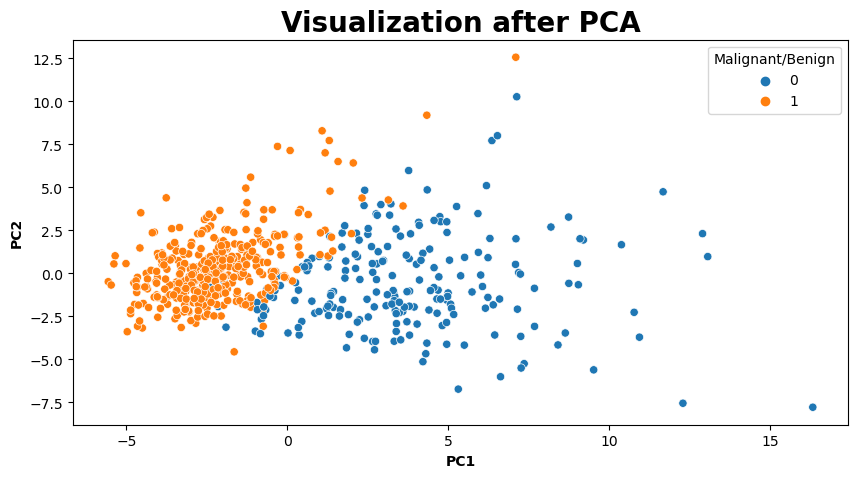

In [104]:
# let's visualize the 2D feature with their corresponding targets using scatterplot.

plt.figure(figsize = (10,5))
plt.title('Visualization after PCA', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1], hue=target_df['Malignant/Benign'], color = 'plasma')
plt.xlabel('PC1', fontsize = 10, fontweight = 'bold')
plt.ylabel('PC2', fontsize = 10, fontweight = 'bold')
plt.show()

## Let's train a Logistic Regression model without using PCA.

In [105]:
# Concatenate Input Features & Target.
df = pd.concat([cancer_df, target_df], axis = 1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant/Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [106]:
# Perform Train Test Split and Standardization.
X = df.drop(columns = ['Malignant/Benign'], axis = 1)
y = df['Malignant/Benign']

# Perform Train Test Split.
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=40)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Perform Standardization.
X_train_arr = scaler.transform(X_train)
X_test_arr  = scaler.transform(X_test)
# print(X_train_arr[:10])

(398, 30) (398,) (171, 30) (171,)


In [107]:
# Perform Model Training.
log_reg = LogisticRegression()
log_reg.fit(X_train_arr,y_train)

LogisticRegression()

In [108]:
log_pred = log_reg.predict(X_test_arr)

In [109]:
# Compare Actual & Predicted Values.
compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : log_pred
})
compare_df.head()

,Actual Values,Predicted Values
295,1,1
16,0,0
431,1,1
453,1,1
15,0,0


In [110]:
# Evaluate Model Performance.
# Training Performance.
acc_score_train = accuracy_score(y_train,log_reg.predict(X_train))
prec_score_train = precision_score(y_train,log_reg.predict(X_train))
rec_score_train = recall_score(y_train,log_reg.predict(X_train))
f1_score_train = f1_score(y_train,log_reg.predict(X_train))
conf_train = confusion_matrix(y_train,log_reg.predict(X_train))
clf_train = classification_report(y_train,log_reg.predict(X_train))

print('Training Performance:')
print('--------------------')
print(f'Accuracy Score of Training Data : {acc_score_train}')
print(f'Precision Score of Training Data : {prec_score_train}')
print(f'Recall Score of Training Data : {rec_score_train}')
print(f'F1 Score of Training Data : {f1_score_train}')
print('Confusion Matrix of Training Data :')
print(conf_train)
print('Classification Report of Training Data :')
print(clf_train)

# Testing Performance.
acc_score_test = accuracy_score(y_test,log_reg.predict(X_test))
prec_score_test = precision_score(y_test,log_reg.predict(X_test))
rec_score_test = recall_score(y_test,log_reg.predict(X_test))
f1_score_test = f1_score(y_test,log_reg.predict(X_test))
conf_test = confusion_matrix(y_test,log_reg.predict(X_test))
clf_test = classification_report(y_test,log_reg.predict(X_test))

print('Testing Performance:')
print('--------------------')
print(f'Accuracy Score of Testing Data : {acc_score_test}')
print(f'Precision Score of Testing Data : {prec_score_test}')
print(f'Recall Score of Testing Data : {rec_score_test}')
print(f'F1 Score of Testing Data : {f1_score_test}')
print('Confusion Matrix of Testing Data :')
print(conf_test)
print('Classification Report of Testing Data :')
print(clf_test)

Training Performance:
--------------------
Accuracy Score of Training Data : 0.39195979899497485
Precision Score of Training Data : 0.0
Recall Score of Training Data : 0.0
F1 Score of Training Data : 0.0
Confusion Matrix of Training Data :
[[156   0]
 [242   0]]
Classification Report of Training Data :
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       156
           1       0.00      0.00      0.00       242

    accuracy                           0.39       398
   macro avg       0.20      0.50      0.28       398
weighted avg       0.15      0.39      0.22       398

Testing Performance:
--------------------
Accuracy Score of Testing Data : 0.32748538011695905
Precision Score of Testing Data : 0.0
Recall Score of Testing Data : 0.0
F1 Score of Testing Data : 0.0
Confusion Matrix of Testing Data :
[[ 56   0]
 [115   0]]
Classification Report of Testing Data :
              precision    recall  f1-score   support

           0     

## Insights:

As we can see the Logistic model has performed very poorly for this use case. There might be a possibility that due to irrelevant features the model may not be able to predict well. So, let's try to employ PCA to reduce dimensions.

In [111]:
# Training Logistic Regression Model using reduced dimensions (2D) obtained from PCA.

X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(pca_data,y,train_size=0.7,random_state=35)
X_train_pca.shape,y_train_pca.shape,X_test_pca.shape,y_test_pca.shape

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca,y_train_pca)

LogisticRegression()

In [112]:
# Perform Precition.
log_pred_pca = log_reg_pca.predict(X_test_pca)

In [113]:
# Compare Actual & Predicted Values.
compare_df_pca = pd.DataFrame({
    'Actual Values' : y_test_pca,
    'Predicted Values' : log_pred_pca
})
compare_df_pca.head()

,Actual Values,Predicted Values
97,1,1
537,1,1
484,1,1
116,1,1
142,1,1


In [114]:
# Evaluate Model Performance.
# Training Performance.
acc_score_train_pca = accuracy_score(y_train_pca,log_reg_pca.predict(X_train_pca))
prec_score_train_pca = precision_score(y_train_pca,log_reg_pca.predict(X_train_pca))
rec_score_train_pca = recall_score(y_train_pca,log_reg_pca.predict(X_train_pca))
f1_score_train_pca = f1_score(y_train_pca,log_reg_pca.predict(X_train_pca))
conf_train_pca = confusion_matrix(y_train_pca,log_reg_pca.predict(X_train_pca))
clf_train_pca = classification_report(y_train_pca,log_reg_pca.predict(X_train_pca))

print('Training Performance:')
print('--------------------')
print(f'Accuracy Score of Training Data : {acc_score_train_pca}')
print(f'Precision Score of Training Data : {prec_score_train_pca}')
print(f'Recall Score of Training Data : {rec_score_train_pca}')
print(f'F1 Score of Training Data : {f1_score_train_pca}')
print('Confusion Matrix of Training Data :')
print(conf_train_pca)
print('Classification Report of Training Data :')
print(clf_train_pca)

# Testing Performance.
acc_score_test_pca = accuracy_score(y_test_pca,log_reg_pca.predict(X_test_pca))
prec_score_test_pca = precision_score(y_test_pca,log_reg_pca.predict(X_test_pca))
rec_score_test_pca = recall_score(y_test_pca,log_reg_pca.predict(X_test_pca))
f1_score_test_pca = f1_score(y_test_pca,log_reg_pca.predict(X_test_pca))
conf_test_pca = confusion_matrix(y_test_pca,log_reg_pca.predict(X_test_pca))
clf_test_pca = classification_report(y_test_pca,log_reg_pca.predict(X_test_pca))

print('Testing Performance:')
print('--------------------')
print(f'Accuracy Score of Testing Data : {acc_score_test_pca}')
print(f'Precision Score of Testing Data : {prec_score_test_pca}')
print(f'Recall Score of Testing Data : {rec_score_test_pca}')
print(f'F1 Score of Testing Data : {f1_score_test_pca}')
print('Confusion Matrix of Testing Data :')
print(conf_test_pca)
print('Classification Report of Testing Data :')
print(clf_test_pca)

Training Performance:
--------------------
Accuracy Score of Training Data : 0.9522613065326633
Precision Score of Training Data : 0.952
Recall Score of Training Data : 0.9714285714285714
F1 Score of Training Data : 0.9616161616161616
Confusion Matrix of Training Data :
[[141  12]
 [  7 238]]
Classification Report of Training Data :
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       153
           1       0.95      0.97      0.96       245

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398

Testing Performance:
--------------------
Accuracy Score of Testing Data : 0.9590643274853801
Precision Score of Testing Data : 0.972972972972973
Recall Score of Testing Data : 0.9642857142857143
F1 Score of Testing Data : 0.968609865470852
Confusion Matrix of Testing Data :
[[ 56   3]
 [  4 108]]
Classification Report of Testing Data :

## Insights:

Awesome!! After providing reduced dimensions to the Logistic Regression model, the model was able to perfectly classify between malignant & benign classes. This therefore proves that there are some unwanted features in the actual dataset which has made the model to perform poorly. Now, let's try to perform hyperparameter tuning for both PCA & the model to see which are the best features that can provide maximum accuracy & recall for Logistic Regression Model.

In [115]:
# Pipelining PCA & Logistic Regression.

pipeline = Pipeline([
    ('pca', PCA()),
    ('Logistic', LogisticRegression())
])
pipeline

# Each Model should be provided in the list of tuples.

Pipeline(steps=[('pca', PCA()), ('Logistic', LogisticRegression())])

In [116]:
# Set the hyperparameters.

params = {
    'pca__n_components' : [2,4,5,8,10,14],
    'Logistic__penalty' : ['l1','l2','elasticnet'],
    'Logistic__C' : [0,0.01,0.1,0.5,1,10,20,30,50,100],
    'Logistic__solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
}
params

# In params, when using pipeline, the parameter name should be in the form of stepname__parametername.

{'pca__n_components': [2, 4, 5, 8, 10, 14],
 'Logistic__penalty': ['l1', 'l2', 'elasticnet'],
 'Logistic__C': [0, 0.01, 0.1, 0.5, 1, 10, 20, 30, 50, 100],
 'Logistic__solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [117]:
# Perform GridSearch CV.
grid = GridSearchCV(estimator=pipeline,param_grid=params,scoring='accuracy',n_jobs=-1,cv=StratifiedKFold(n_splits=5))
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('Logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'Logistic__C': [0, 0.01, 0.1, 0.5, 1, 10, 20, 30, 50,
                                         100],
                         'Logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'Logistic__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'newton-cholesky', 'sag',
                                              'saga'],
                         'pca__n_components': [2, 4, 5, 8, 10, 14]},
             scoring='accuracy')

In [118]:
X_train.shape,y_train.shape

((398, 30), (398,))

In [134]:
# Perform Standardization of X_train & X_test.
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [135]:
# Train the model.
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('Logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'Logistic__C': [0, 0.01, 0.1, 0.5, 1, 10, 20, 30, 50,
                                         100],
                         'Logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'Logistic__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'newton-cholesky', 'sag',
                                              'saga'],
                         'pca__n_components': [2, 4, 5, 8, 10, 14]},
             scoring='accuracy')

In [136]:
# Fetch the best score.
grid.best_score_

0.9723734177215191

In [137]:
# Fetch the best estimator.
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('Logistic', LogisticRegression(C=0.1, solver='liblinear'))])

In [138]:
# Fetch the best parameters.
grid.best_params_

{'Logistic__C': 0.1,
 'Logistic__penalty': 'l2',
 'Logistic__solver': 'liblinear',
 'pca__n_components': 10}

In [139]:
# Create a pipeline with the best hyperparameters.
pipe_pca_logistic = Pipeline([
    ('pca',PCA(n_components = 10)),
    ('Logistic',LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear'))
])
pipe_pca_logistic

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('Logistic', LogisticRegression(C=0.1, solver='liblinear'))])

In [140]:
# Perform Training.
pipe_pca_logistic.fit(X_train_scaled,y_train)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('Logistic', LogisticRegression(C=0.1, solver='liblinear'))])

In [141]:
# Perform Prediction.
prediction = pipe_pca_logistic.predict(X_test_scaled)

In [142]:
# Compare Actual & Predicted Values.
compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : prediction
})
compare_df.head()

,Actual Values,Predicted Values
295,1,1
16,0,0
431,1,1
453,1,1
15,0,0


In [143]:
# Evaluate Model Performance.
# Training Performance.
new_acc_score_train = accuracy_score(y_train,pipe_pca_logistic.predict(X_train_scaled))
new_prec_score_train = precision_score(y_train,pipe_pca_logistic.predict(X_train_scaled))
new_rec_score_train = recall_score(y_train,pipe_pca_logistic.predict(X_train_scaled))
new_f1_score_train = f1_score(y_train,pipe_pca_logistic.predict(X_train_scaled))
new_conf_train = confusion_matrix(y_train,pipe_pca_logistic.predict(X_train_scaled))
new_clf_train = classification_report(y_train,pipe_pca_logistic.predict(X_train_scaled))

print('Training Performance:')
print('--------------------')
print(f'Accuracy Score of Training Data : {new_acc_score_train}')
print(f'Precision Score of Training Data : {new_prec_score_train}')
print(f'Recall Score of Training Data : {new_rec_score_train}')
print(f'F1 Score of Training Data : {new_f1_score_train}')
print('Confusion Matrix of Training Data :')
print(new_conf_train)
print('Classification Report of Training Data :')
print(new_clf_train)

# Testing Performance.
new_acc_score_test = accuracy_score(y_test,pipe_pca_logistic.predict(X_test_scaled))
new_prec_score_test = precision_score(y_test,pipe_pca_logistic.predict(X_test_scaled))
new_rec_score_test = recall_score(y_test,pipe_pca_logistic.predict(X_test_scaled))
new_f1_score_test = f1_score(y_test,pipe_pca_logistic.predict(X_test_scaled))
new_conf_test = confusion_matrix(y_test,pipe_pca_logistic.predict(X_test_scaled))
new_clf_test = classification_report(y_test,pipe_pca_logistic.predict(X_test_scaled))

print('Testing Performance:')
print('--------------------')
print(f'Accuracy Score of Testing Data : {new_acc_score_test}')
print(f'Precision Score of Testing Data : {new_prec_score_test}')
print(f'Recall Score of Testing Data : {new_rec_score_test}')
print(f'F1 Score of Testing Data : {new_f1_score_test}')
print('Confusion Matrix of Testing Data :')
print(new_conf_test)
print('Classification Report of Testing Data :')
print(new_clf_test)

Training Performance:
--------------------
Accuracy Score of Training Data : 0.9824120603015075
Precision Score of Training Data : 0.9795918367346939
Recall Score of Training Data : 0.9917355371900827
F1 Score of Training Data : 0.9856262833675565
Confusion Matrix of Training Data :
[[151   5]
 [  2 240]]
Classification Report of Training Data :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.98      0.99      0.99       242

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Testing Performance:
--------------------
Accuracy Score of Testing Data : 0.9883040935672515
Precision Score of Testing Data : 0.991304347826087
Recall Score of Testing Data : 0.991304347826087
F1 Score of Testing Data : 0.991304347826087
Confusion Matrix of Testing Data :
[[ 55   1]
 [  1 114]]
Classification Report of Te

In [ ]:
# Performance of Logistic Regression with PCA (2D) before hyperparameter tuning.
# Training Performance:
# --------------------
# Accuracy Score of Training Data : 0.9522613065326633
# Precision Score of Training Data : 0.952
# Recall Score of Training Data : 0.9714285714285714
# F1 Score of Training Data : 0.9616161616161616
# Confusion Matrix of Training Data :
# [[141  12]
#  [  7 238]]
# Classification Report of Training Data :
#               precision    recall  f1-score   support

#            0       0.95      0.92      0.94       153
#            1       0.95      0.97      0.96       245

#     accuracy                           0.95       398
#    macro avg       0.95      0.95      0.95       398
# weighted avg       0.95      0.95      0.95       398

# Testing Performance:
# --------------------
# Accuracy Score of Testing Data : 0.9590643274853801
# Precision Score of Testing Data : 0.972972972972973
# Recall Score of Testing Data : 0.9642857142857143
# F1 Score of Testing Data : 0.968609865470852
# Confusion Matrix of Testing Data :
# [[ 56   3]
#  [  4 108]]
# Classification Report of Testing Data :
#               precision    recall  f1-score   support

#            0       0.93      0.95      0.94        59
#            1       0.97      0.96      0.97       112

#     accuracy                           0.96       171
#    macro avg       0.95      0.96      0.95       171
# weighted avg       0.96      0.96      0.96       171

## Insights:

Great!! The recall has further increased along with the accuracy after performing cross validation. Out of all values predicted, only ~1% of prediction is falsely predicted as negative (recall). Hence, the model can be used to accurately predict the possibility of breast cancer for any given data.

# Apply LDA for the same dataset.

In [151]:
# As LDA requires both features & target to perform dimensionality reduction & perfect class separation, we'll use the
# below dataframe.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant/Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


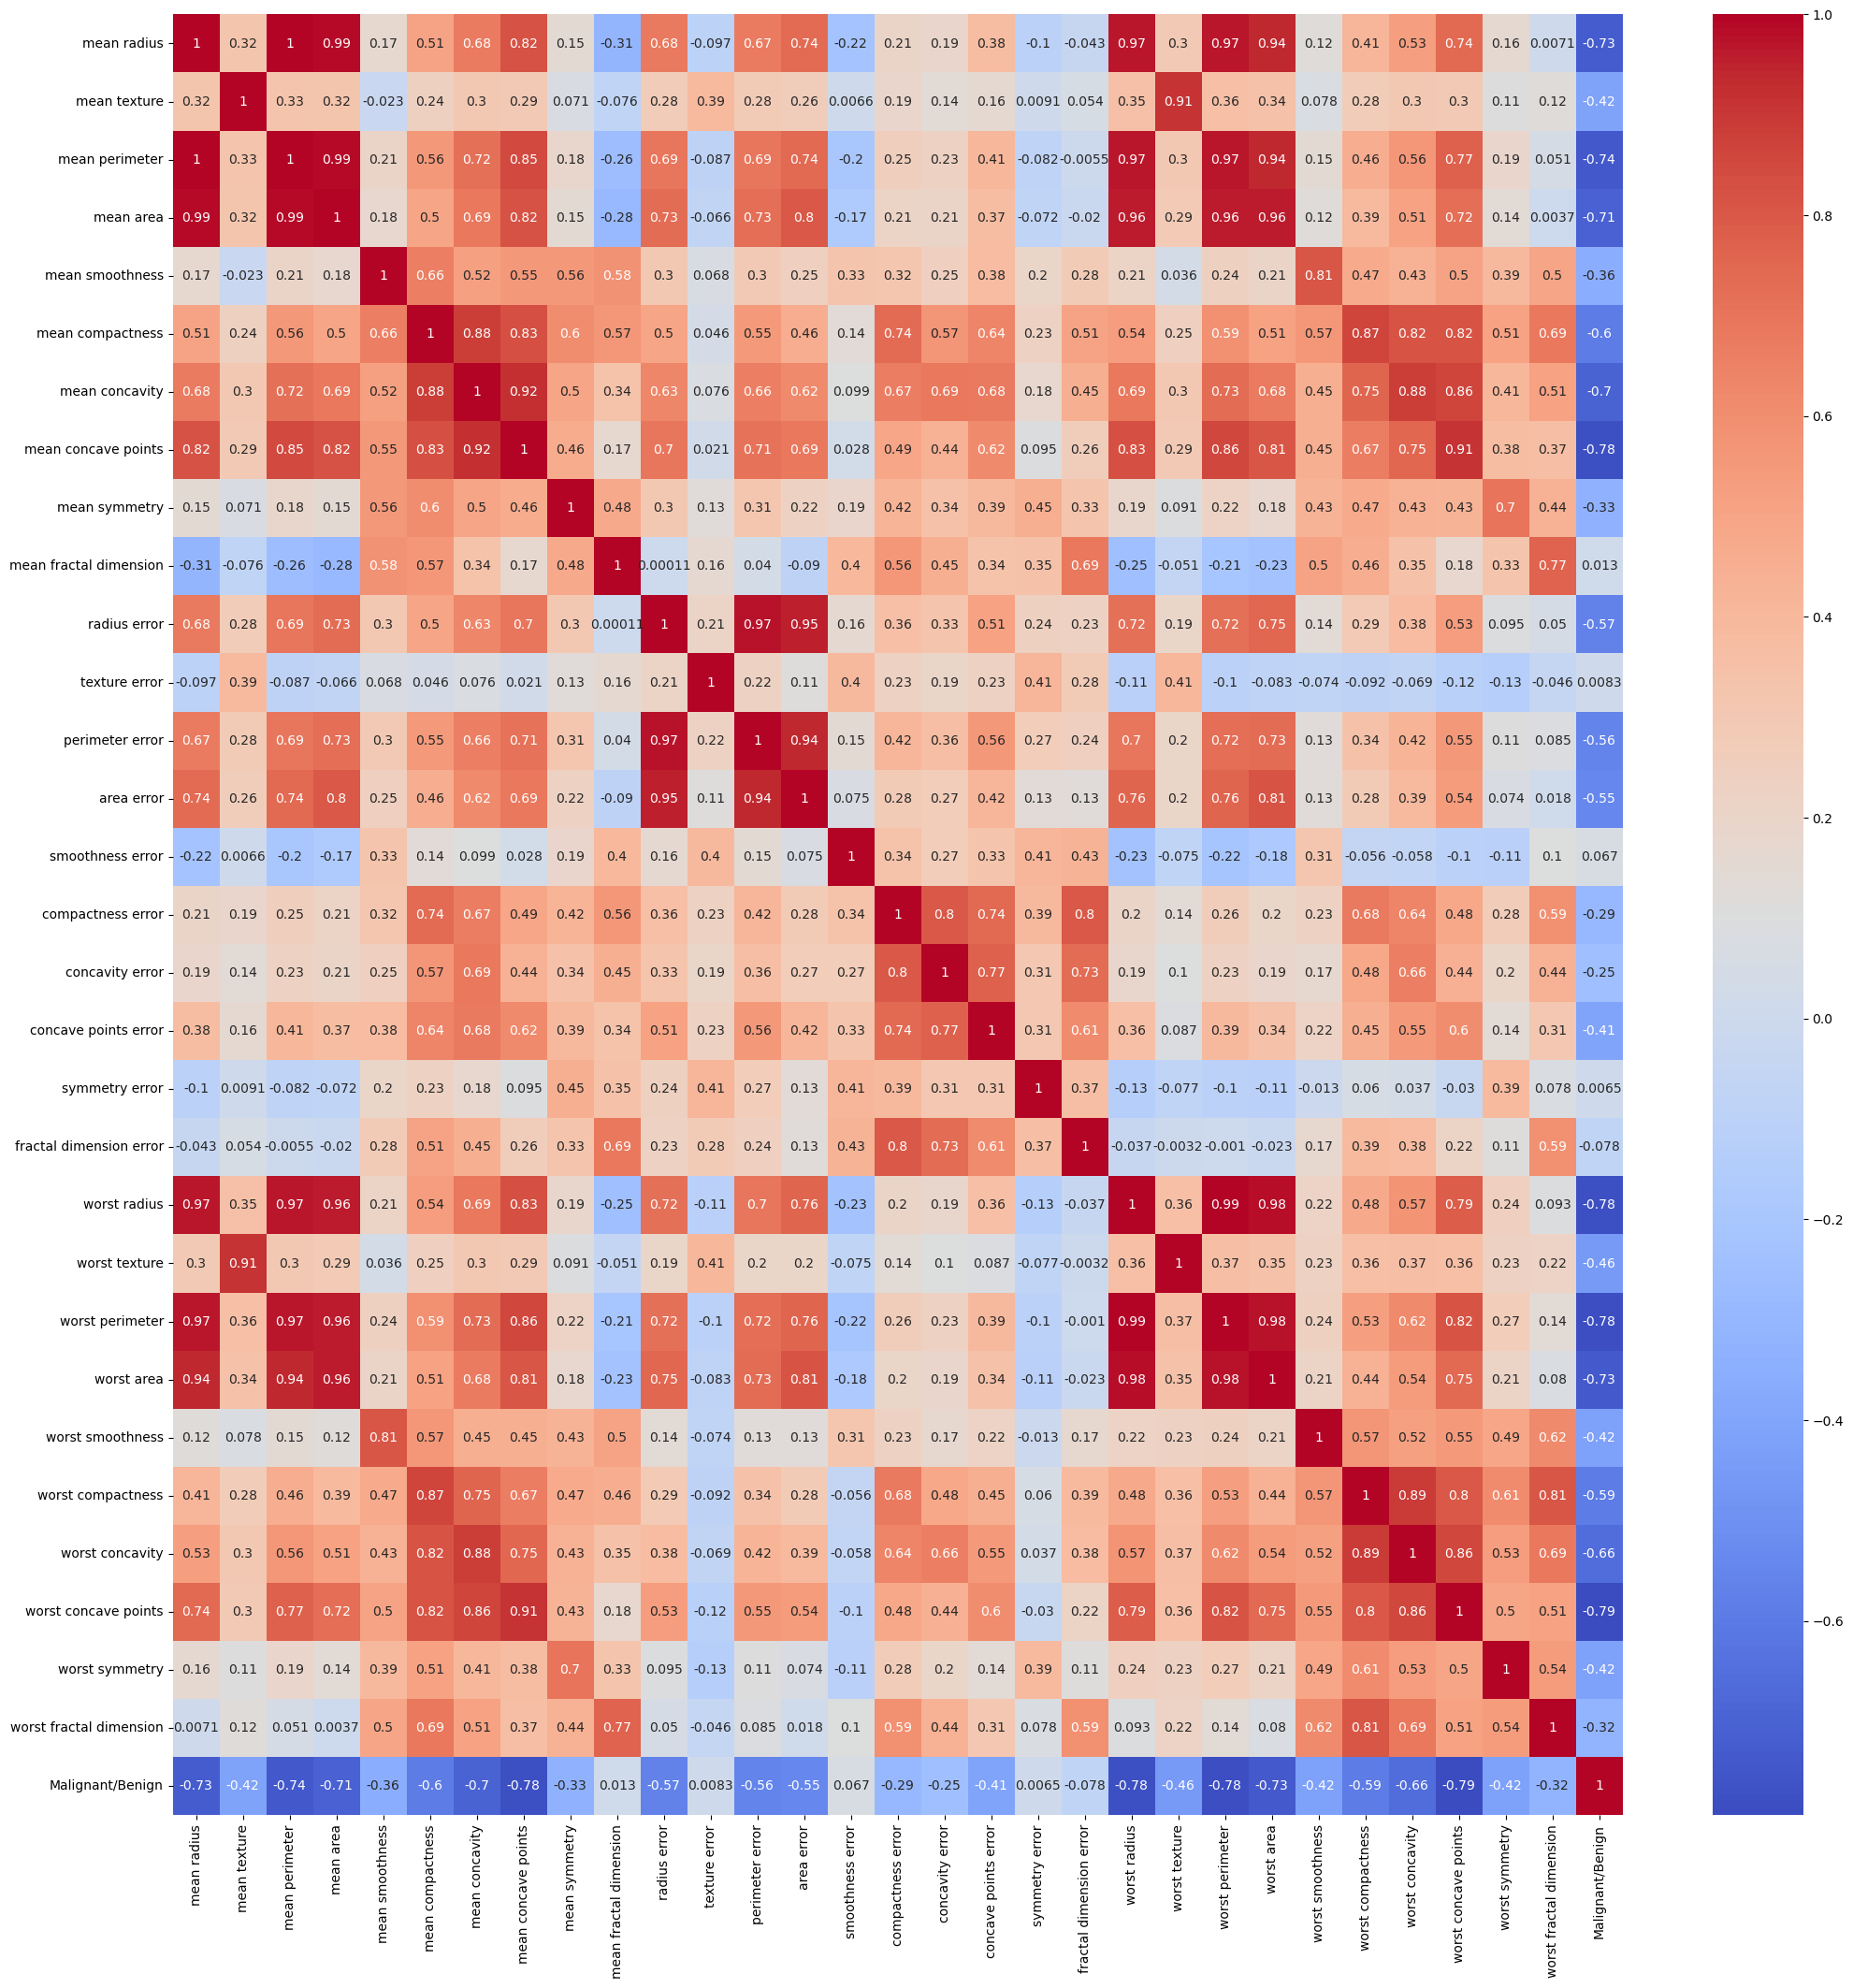

In [152]:
# Apply Pearson Correlation to check the relationship of each feature with target.
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

## Insights:

Out of 30 input features, there are few features which are not even relevant with respect to target. Hence, those features can be ignored / reduced in terms of dimensionality.

In [153]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [154]:
# Training LDA with min(n_features,n_classes-1)
# n_classes  = no. of classes in target = 2
# n_features = no. of input features = 30
# min(n_features,n_classes-1) = min(30,1) = 1
# So, n_components can only be 1 and not more than that. Otherwise, it will throw the below error.
# ValueError: n_components cannot be larger than min(n_features, n_classes - 1)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_scaled,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [155]:
# Perform Prediction using LDA.
lda_pred = lda.predict(X_test_scaled)

In [156]:
# Compare Actual & Predicted Values.
lda_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : lda_pred
})
lda_compare_df.head()

,Actual Values,Predicted Values
295,1,1
16,0,0
431,1,1
453,1,1
15,0,0


In [157]:
# Evaluate Model Performance.
# Training Performance.
lda_acc_score_train = accuracy_score(y_train,lda.predict(X_train_scaled))
lda_prec_score_train = precision_score(y_train,lda.predict(X_train_scaled))
lda_rec_score_train = recall_score(y_train,lda.predict(X_train_scaled))
lda_f1_score_train = f1_score(y_train,lda.predict(X_train_scaled))
lda_conf_train = confusion_matrix(y_train,lda.predict(X_train_scaled))
lda_clf_train = classification_report(y_train,lda.predict(X_train_scaled))

print('Training Performance:')
print('--------------------')
print(f'Accuracy Score of Training Data : {lda_acc_score_train}')
print(f'Precision Score of Training Data : {lda_prec_score_train}')
print(f'Recall Score of Training Data : {lda_rec_score_train}')
print(f'F1 Score of Training Data : {lda_f1_score_train}')
print('Confusion Matrix of Training Data :')
print(lda_conf_train)
print('Classification Report of Training Data :')
print(lda_clf_train)

# Testing Performance.
lda_acc_score_test = accuracy_score(y_test,lda.predict(X_test_scaled))
lda_prec_score_test = precision_score(y_test,lda.predict(X_test_scaled))
lda_rec_score_test = recall_score(y_test,lda.predict(X_test_scaled))
lda_f1_score_test = f1_score(y_test,lda.predict(X_test_scaled))
lda_conf_test = confusion_matrix(y_test,lda.predict(X_test_scaled))
lda_clf_test = classification_report(y_test,lda.predict(X_test_scaled))

print('Testing Performance:')
print('--------------------')
print(f'Accuracy Score of Testing Data : {lda_acc_score_test}')
print(f'Precision Score of Testing Data : {lda_prec_score_test}')
print(f'Recall Score of Testing Data : {lda_rec_score_test}')
print(f'F1 Score of Testing Data : {lda_f1_score_test}')
print('Confusion Matrix of Testing Data :')
print(lda_conf_test)
print('Classification Report of Testing Data :')
print(lda_clf_test)

Training Performance:
--------------------
Accuracy Score of Training Data : 0.9597989949748744
Precision Score of Training Data : 0.94140625
Recall Score of Training Data : 0.9958677685950413
F1 Score of Training Data : 0.967871485943775
Confusion Matrix of Training Data :
[[141  15]
 [  1 241]]
Classification Report of Training Data :
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       156
           1       0.94      1.00      0.97       242

    accuracy                           0.96       398
   macro avg       0.97      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398

Testing Performance:
--------------------
Accuracy Score of Testing Data : 0.9707602339181286
Precision Score of Testing Data : 0.9583333333333334
Recall Score of Testing Data : 1.0
F1 Score of Testing Data : 0.9787234042553191
Confusion Matrix of Testing Data :
[[ 51   5]
 [  0 115]]
Classification Report of Testing Data :
        

## Insights:

Looks like the accuracy of LDA is almost similar to the below model's performance. However, in this case, the recall has reached 100% which denotes that of all the predictions that has been made by LDA, no predictions are falsely predicted as negative even though they are positive.

On the contrary, the precision has been reduced when compared to below parameters. So, out of all actual positives, only 96% are correctly predicted as positives. Remaining 4% are falsely predicted as positives.

However, for this use case, we need to focus more on achieving maximum recall rather than getting a good precision. Hence, LDA can be better used for this use case when compared to a combination of PCA & Logistic Regression (with hyperparameters).

In [ ]:
# Logistic Regression Model's performance with best hyperparamters after applying PCA with n_components as 10.
# Training Performance:
# --------------------
# Accuracy Score of Training Data : 0.9824120603015075
# Precision Score of Training Data : 0.9795918367346939
# Recall Score of Training Data : 0.9917355371900827
# F1 Score of Training Data : 0.9856262833675565
# Confusion Matrix of Training Data :
# [[151   5]
#  [  2 240]]
# Classification Report of Training Data :
#               precision    recall  f1-score   support

#            0       0.99      0.97      0.98       156
#            1       0.98      0.99      0.99       242

#     accuracy                           0.98       398
#    macro avg       0.98      0.98      0.98       398
# weighted avg       0.98      0.98      0.98       398

# Testing Performance:
# --------------------
# Accuracy Score of Testing Data : 0.9883040935672515
# Precision Score of Testing Data : 0.991304347826087
# Recall Score of Testing Data : 0.991304347826087
# F1 Score of Testing Data : 0.991304347826087
# Confusion Matrix of Testing Data :
# [[ 55   1]
#  [  1 114]]
# Classification Report of Testing Data :
#               precision    recall  f1-score   support

#            0       0.98      0.98      0.98        56
#            1       0.99      0.99      0.99       115

#     accuracy                           0.99       171
#    macro avg       0.99      0.99      0.99       171
# weighted avg       0.99      0.99      0.99       171

In [159]:
pd.set_option('display.max_columns',None)

In [165]:
df[df['Malignant/Benign']==1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant/Benign
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,0.3141,3.8960,2.041,22.810,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [168]:
# Let's take a sample that has target of 1.
df.iloc[19,:]

mean radius                 13.540000
mean texture                14.360000
mean perimeter              87.460000
mean area                  566.300000
mean smoothness              0.097790
mean compactness             0.081290
mean concavity               0.066640
mean concave points          0.047810
mean symmetry                0.188500
mean fractal dimension       0.057660
radius error                 0.269900
texture error                0.788600
perimeter error              2.058000
area error                  23.560000
smoothness error             0.008462
compactness error            0.014600
concavity error              0.023870
concave points error         0.013150
symmetry error               0.019800
fractal dimension error      0.002300
worst radius                15.110000
worst texture               19.260000
worst perimeter             99.700000
worst area                 711.200000
worst smoothness             0.144000
worst compactness            0.177300
worst concav

In [169]:
# Prediction on new unseen data using LDA.
# scaler() - Standardization.
# lda - Linear Discriminant Analysis.

new_df = pd.DataFrame({
    'mean radius' : [14.5],
    'mean texture' : [20.3],
    'mean perimeter' : [66.3],
    'mean area' : [550.4],
    'mean smoothness' : [0.04],
    'mean compactness' : [0.1],
    'mean concavity' : [0.03],
    'mean concave points' : [0.01],
    'mean symmetry' : [0.1254],
    'mean fractal dimension' : [0.04],
    'radius error' : [0.4244],
    'texture error': [1.520],
    'perimeter error' : [3.2241],
    'area error' : [21.325],
    'smoothness error' : [0.005125],
    'compactness error' : [0.0352],
    'concavity error' : [0.04678],
    'concave points error' : [0.00234],
    'symmetry error' : [0.02982],
    'fractal dimension error' : [0.003215],
    'worst radius' : [13.485],
    'worst texture' : [18.56],
    'worst perimeter' : [78.86],
    'worst area' : [548.6],
    'worst smoothness' : [0.1854],
    'worst compactness' : [0.4852],
    'worst concavity' : [0.4358],
    'worst concave points' : [0.0835],
    'worst symmetry' : [0.3840],
    'worst fractal dimension' : [0.1052]   
})

new_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.5,20.3,66.3,550.4,0.04,0.1,0.03,0.01,0.1254,0.04,0.4244,1.52,3.2241,21.325,0.005125,0.0352,0.04678,0.00234,0.02982,0.003215,13.485,18.56,78.86,548.6,0.1854,0.4852,0.4358,0.0835,0.384,0.1052


In [170]:
new_df.shape

(1, 30)

In [171]:
# Perform Standardization.
new_df_scaled = scaler.transform(new_df)
new_df_scaled

array([[ 0.10585444,  0.23511557, -1.05731263, -0.29717773, -4.01090432,
        -0.08226807, -0.73822371, -1.00387976, -2.03583405, -3.23179842,
         0.06939769,  0.55001213,  0.17724114, -0.41829824, -0.63868553,
         0.54335034,  0.49358485, -1.53387683,  1.12333018, -0.21934942,
        -0.57655707, -1.15899561, -0.84595393, -0.58359736,  2.32467895,
         1.46906897,  0.7849301 , -0.47364194,  1.5194912 ,  1.17781791]])

In [172]:
# Predict whether the person is Malignant(1)/Benign(0).
lda.predict(new_df_scaled)

array([1])

## Insights:

The person has breast cancer as per the above input parameters.

In [ ]:
# Points to Note:

# 1. Always standardize the data before applying PCA.
# 2. The first component PC1 will have the highest variance (more spread), next highest will be PC2 and so on.
#    So, the variance hierarchy will be PC1 > PC2 > PC3 > ....... > PCn


# Errors observed:
# 1. TypeError: 'LogisticRegression' object is not subscriptable - Occured while training grid search cv. 
#    Reason - paranthesis () were not provided for each model in the pipeline.